In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bambous virieux
Processing Record 2 of Set 1 | coquimbo
Processing Record 3 of Set 1 | bandarbeyla
Processing Record 4 of Set 1 | kargalinskaya
Processing Record 5 of Set 1 | kahului
Processing Record 6 of Set 1 | buchanan
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | bengkulu
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | touros
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | manzhouli
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | flin flon
Processing Record 19 of Set 1 | adamovka
Processing Record 20 of Set 1 | bogovarovo
Processing Record 21 of Set 1 | broome
Processing Record 22 of Set 1 | saint george
Processing Record 23

Processing Record 39 of Set 4 | dhidhdhoo
Processing Record 40 of Set 4 | ceres
Processing Record 41 of Set 4 | karpathos
Processing Record 42 of Set 4 | klaksvik
Processing Record 43 of Set 4 | kavieng
Processing Record 44 of Set 4 | mecca
Processing Record 45 of Set 4 | ballinasloe
Processing Record 46 of Set 4 | cayenne
Processing Record 47 of Set 4 | tiksi
Processing Record 48 of Set 4 | jacqueville
Processing Record 49 of Set 4 | clyde river
Processing Record 50 of Set 4 | te anau
Processing Record 1 of Set 5 | saleaula
City not found. Skipping...
Processing Record 2 of Set 5 | sidi ali
Processing Record 3 of Set 5 | vao
Processing Record 4 of Set 5 | luwuk
Processing Record 5 of Set 5 | loreto
Processing Record 6 of Set 5 | general roca
Processing Record 7 of Set 5 | port lincoln
Processing Record 8 of Set 5 | ngukurr
City not found. Skipping...
Processing Record 9 of Set 5 | dikson
Processing Record 10 of Set 5 | acarau
Processing Record 11 of Set 5 | nikolskoye
Processing Recor

Processing Record 31 of Set 8 | punta cardon
Processing Record 32 of Set 8 | shimoda
Processing Record 33 of Set 8 | lata
Processing Record 34 of Set 8 | garowe
Processing Record 35 of Set 8 | bobo dioulasso
Processing Record 36 of Set 8 | hambantota
Processing Record 37 of Set 8 | bojnurd
Processing Record 38 of Set 8 | verkhnyaya maksakovka
Processing Record 39 of Set 8 | capitan bado
Processing Record 40 of Set 8 | saint anthony
Processing Record 41 of Set 8 | karasburg
Processing Record 42 of Set 8 | tivaouane
Processing Record 43 of Set 8 | shihezi
Processing Record 44 of Set 8 | revelstoke
Processing Record 45 of Set 8 | nicoya
Processing Record 46 of Set 8 | tiarei
Processing Record 47 of Set 8 | sheboygan
Processing Record 48 of Set 8 | vestmannaeyjar
Processing Record 49 of Set 8 | tolaga bay
Processing Record 50 of Set 8 | pavilosta
Processing Record 1 of Set 9 | edewecht
Processing Record 2 of Set 9 | nhulunbuy
Processing Record 3 of Set 9 | akdepe
Processing Record 4 of Set

Processing Record 20 of Set 12 | lisakovsk
Processing Record 21 of Set 12 | korla
Processing Record 22 of Set 12 | mayumba
Processing Record 23 of Set 12 | datong
Processing Record 24 of Set 12 | maceio
Processing Record 25 of Set 12 | santiago del estero
Processing Record 26 of Set 12 | sliven
Processing Record 27 of Set 12 | butajira
Processing Record 28 of Set 12 | yangjiang
Processing Record 29 of Set 12 | tomakomai
Processing Record 30 of Set 12 | areka
Processing Record 31 of Set 12 | sao felix do xingu
Processing Record 32 of Set 12 | ostersund
Processing Record 33 of Set 12 | ucluelet
Processing Record 34 of Set 12 | hay river
Processing Record 35 of Set 12 | collie
Processing Record 36 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 37 of Set 12 | north bend
Processing Record 38 of Set 12 | hovd
Processing Record 39 of Set 12 | zharkent
Processing Record 40 of Set 12 | black forest
Processing Record 41 of Set 12 | krasnoselkup
Processing Record 42 of Set 1

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bambous Virieux,-20.3428,57.7575,66.45,94,75,3.44,MU,2021-08-08 02:26:26
1,Coquimbo,-29.9533,-71.3436,53.33,82,90,6.91,CL,2021-08-08 02:26:26
2,Bandarbeyla,9.4942,50.8122,76.23,73,10,25.95,SO,2021-08-08 02:26:27
3,Kargalinskaya,43.7417,46.4792,75.45,60,68,3.78,RU,2021-08-08 02:26:27
4,Kahului,20.8947,-156.4700,82.98,64,1,23.02,US,2021-08-08 02:26:27
5,Buchanan,5.8808,-10.0467,76.06,81,76,7.70,LR,2021-08-08 02:26:28
6,Barrow,71.2906,-156.7887,37.42,84,90,11.50,US,2021-08-08 02:26:28
7,Bengkulu,-3.8004,102.2655,81.52,76,12,2.30,ID,2021-08-08 02:26:28
8,Bilibino,68.0546,166.4372,62.33,40,46,15.10,RU,2021-08-08 02:26:29
9,New Norfolk,-42.7826,147.0587,50.92,37,55,3.85,AU,2021-08-08 02:25:36


In [11]:
new_column_order = ["City" , "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bambous Virieux,MU,2021-08-08 02:26:26,-20.3428,57.7575,66.45,94,75,3.44
1,Coquimbo,CL,2021-08-08 02:26:26,-29.9533,-71.3436,53.33,82,90,6.91
2,Bandarbeyla,SO,2021-08-08 02:26:27,9.4942,50.8122,76.23,73,10,25.95
3,Kargalinskaya,RU,2021-08-08 02:26:27,43.7417,46.4792,75.45,60,68,3.78
4,Kahului,US,2021-08-08 02:26:27,20.8947,-156.4700,82.98,64,1,23.02
5,Buchanan,LR,2021-08-08 02:26:28,5.8808,-10.0467,76.06,81,76,7.70
6,Barrow,US,2021-08-08 02:26:28,71.2906,-156.7887,37.42,84,90,11.50
7,Bengkulu,ID,2021-08-08 02:26:28,-3.8004,102.2655,81.52,76,12,2.30
8,Bilibino,RU,2021-08-08 02:26:29,68.0546,166.4372,62.33,40,46,15.10
9,New Norfolk,AU,2021-08-08 02:25:36,-42.7826,147.0587,50.92,37,55,3.85


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

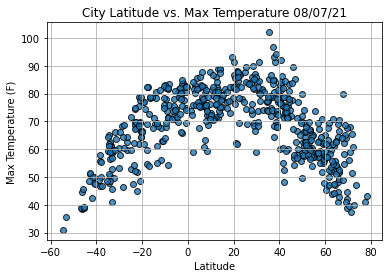

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

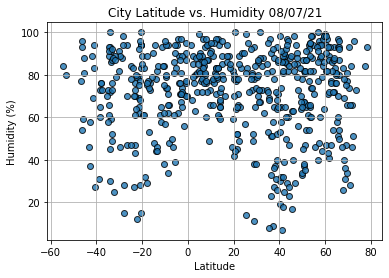

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

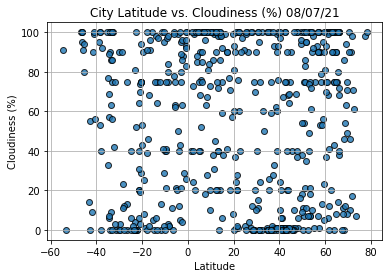

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

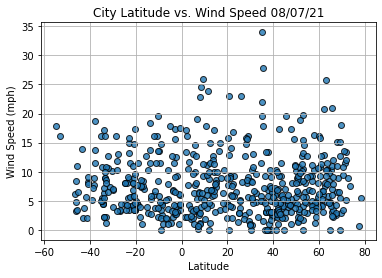

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [37]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

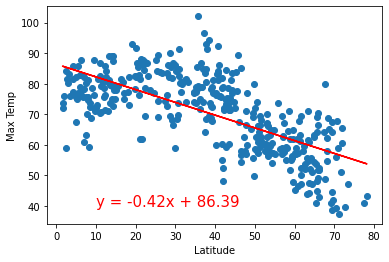

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

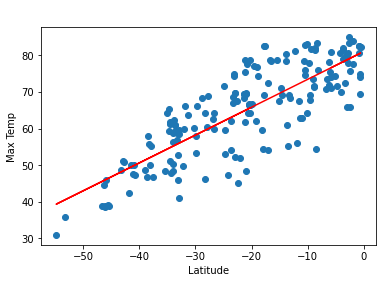

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

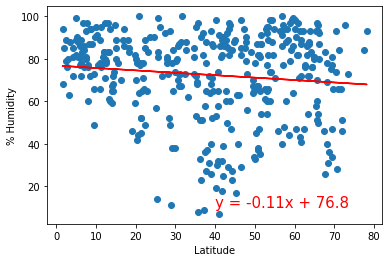

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

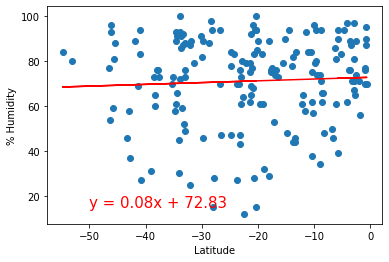

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

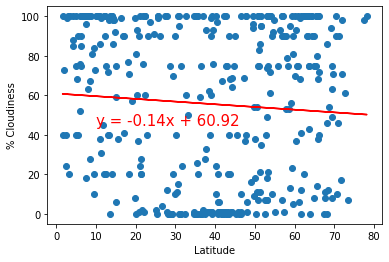

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,45))

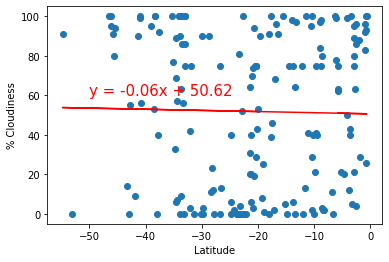

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

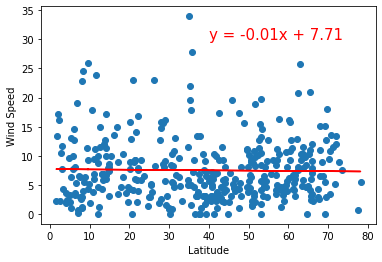

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

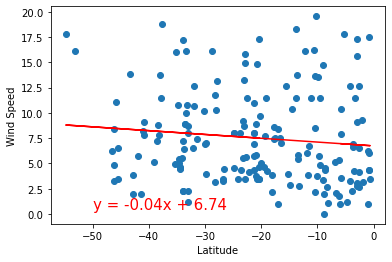

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,.5))